In [173]:
import numpy as np
import pandas as pd
import sympy as sp

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1.

In [174]:
data = {'entrenamiento': [0, 1, 2, 3, 4, 5],
        'Y': [0, 1, 2, 3, 4, 5],
        'X_1': [0, 1, 2, 3, 4, 5]}

In [175]:
df = pd.DataFrame(data)
df = df.set_index('entrenamiento')
df

,Y,X_1
entrenamiento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


# 2.

In [176]:
def J(thetas, X, Y):
  m = len(X)
  sum = 0
  for i in range(m):
    sum += (thetas[0] + thetas[1]*X[i] - Y[i])**2
  return 1/(2*m)*sum

# 3.

In [177]:
thetas1 = np.arange(-6, 9, 0.1)
Js = [J([0, theta1_i], df['X_1'], df['Y']) for theta1_i in thetas1]

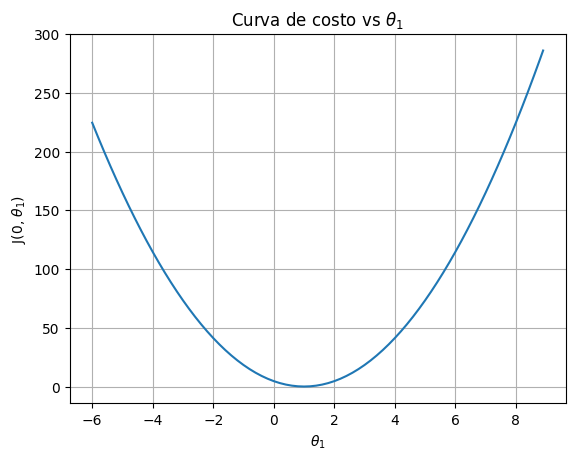

In [178]:
plt.plot(thetas1, Js)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'J(0, $\theta_1$)')
plt.title(r'Curva de costo vs $\theta_1$')
plt.grid()
plt.show()

Se observa que el mínimo puede estár en $\theta_1$ = 1, esto se verifica:

In [179]:
theta1 = 1
print(J([0, theta1], df['X_1'], df['Y']))

0.0


[]

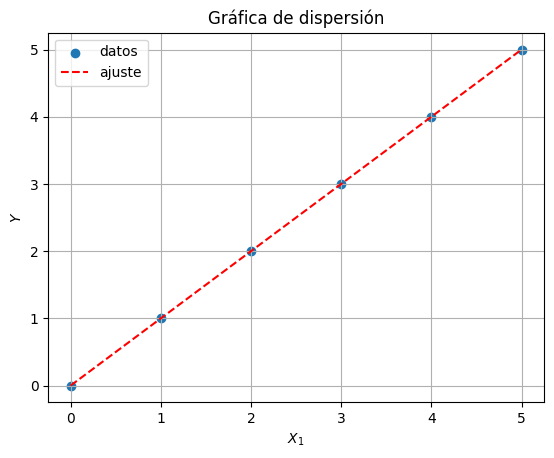

In [180]:
plt.scatter(df['X_1'], df['Y'], label='datos')
plt.plot(df['X_1'], theta1*df['X_1'], '--', color='red', label='ajuste')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$Y$')
plt.title(r'Gráfica de dispersión')
plt.grid()
plt.legend()
plt.plot()

# 4.

In [181]:
thetas0 = np.arange(-6, 9)
thetas1 = np.arange(-6, 9)
thetas0, thetas1 = np.meshgrid(thetas0, thetas1)

In [182]:
Js = np.zeros((len(thetas0), len(thetas1)))
for i in range(len(thetas0)):
  for j in range(len(thetas1)):
    Js[j][i] = J([thetas0[i][j], thetas1[i][j]], df['X_1'], df['Y'])

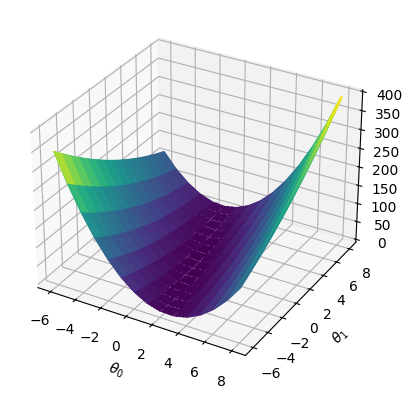

In [183]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(thetas0, thetas1, Js, cmap='viridis')
ax.contour(thetas0, thetas1, Js, 200, linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")

plt.show()

# 5.

In [184]:
t0, t1 = sp.symbols('theta_0 theta_1')

cuando $\theta_0 = 0$, $J$ es:

In [185]:
J0 = 1/12*((t1 - 1)**2 + (2*t1 - 2)**2 + (3*t1 - 3)**2 + (4*t1 - 4)**2 + (5*t1 - 5)**2)
J0.simplify()

4.58333333333333*(theta_1 - 1)**2

Ahora cuando $\theta_0$ es distinto de cero, $J$ es:

In [186]:
J1 = 1/12*((t0 + t1 - 1)**2 + (t0 + 2*t1 - 2)**2 + (t0 + 3*t1 - 3)**2 + (t0 + 4*t1 - 4)**2 + (t0 + 5*t1 - 5)**2)
J1.simplify()

0.416666666666667*theta_0**2 + 2.5*theta_0*theta_1 - 2.5*theta_0 + 4.58333333333333*theta_1**2 - 9.16666666666667*theta_1 + 4.58333333333333

# 6.

In [187]:
f = lambda x: (x - 4)**2
df_dx = lambda x: 2*(x - 4)

In [188]:
def descent(w0, alpha, df_dx):
  return w0 - alpha * df_dx(w0)

In [189]:
def gradient_descent(w0, alpha, f, df_dx, eps=1e-4):
  w = w0
  while True:
    w_new = descent(w, alpha, df_dx)
    if f(w_new)< eps:
      break
    w = w_new
  return w

probando con $\alpha = 0.01$

In [192]:
w0 = 3
alpha = 0.01

gradient_descent(w0, alpha, f, df_dx)

3.989806597289866

probando con $\alpha = 0.5$

In [193]:
alpha = 0.5

gradient_descent(w0, alpha, f, df_dx)

3

probando con $\alpha = 0.1$

In [194]:
alpha = 0.1

gradient_descent(w0, alpha, f, df_dx)

3.9884707849539316

# 7.

Se generan los valores para $X$ e $Y$:

In [195]:
n_vals = 100
X = np.linspace(-2, 2, n_vals)
Y = np.linspace(-2, 2, n_vals)

Se crea la función `F`, donde el parámetro `u` es un vector que contiene a $X$ e $Y$:

In [196]:
F = lambda u: np.sin(0.5*u[0]**2-0.25*u[1]**2+3)*np.cos(2*u[0]+1-np.e**u[1])

Se crea la matriz `Z` de valores de la función `F`:

In [197]:
Z = np.zeros((n_vals, n_vals))

for i, x in enumerate(X):
  for j, y in enumerate(Y):
    Z[j, i] = F([x, y])

**Gráfica y mapa de contorno de `F`**

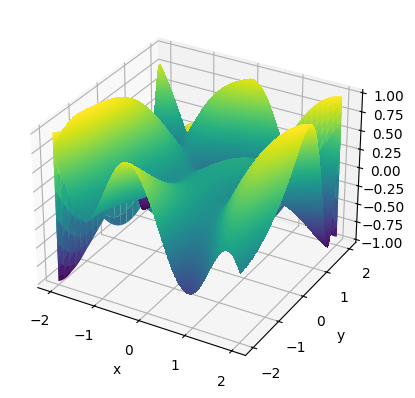

In [198]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.contourf(X, Y, Z, 200, linestyles="solid")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

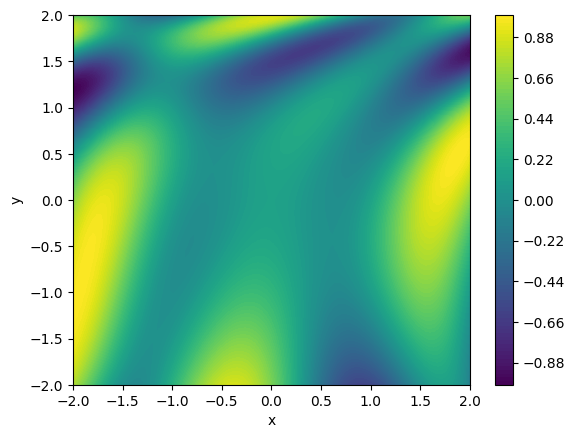

In [199]:
plt.contourf(X, Y, Z, 100, linestyles="solid")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

plt.show()

**Descenso del gradiente**

Se define la función `grad()` la cual calcula el gradiente de una función `f` en un punto `u` con un paso `h`. Se observa que esta función calcula tando la derivada parcial para $x$ como para $y$ a la vez usando la definición de derivada.

In [200]:
def grad(f, u, h=1e-3):
  return f(u + h) - f(u - h) / (2*h)

Se define la función `n_gradient_descent()` la cuál calcula el descenso del gradiente para una función `f` para dos variables o más variables donde `u` es un punto inicial, `alpha` es el learning rate, `n_it` el número de iteraciones, `h` el paso de las derivadas del gradiente y `eps` es el error con el que se determina el mínimo.

In [201]:
def n_gradient_descent(f, u, alpha, n_it=1000, h=1e-3, eps=1e-4):
  u_ = u
  for i in range(n_it):
    u_new = u_ - alpha * grad(f, u_, h)
    if f(u_new) < eps:
      break
    u_ = u_new
  return u_

Se genera un punto aleatorio `u` entre $-2$ y $-2$, esto se hace para probar este método en un punto cualquiera de la función y se usa eeste punto en `n_gradient_descent()` junto con la función `F`y un $\alpha = 0.001$ para encontrar un mínimo de la función.

In [202]:
u = np.random.rand(2) * 4 - 2
u0 = n_gradient_descent(F, u, 0.001)

F(u0)

np.float64(0.00010140681170146945)

# 8.

Se usa un proceso similar al de DotCSV.

Se redefine la función `gradient()` para que se pueda usar junto a la función de coste anteriormente definida `J()`:

In [203]:
def gradient(f, thetas, X, y, h=1e-3):
  thetas_ = np.copy(thetas)
  gradi = np.zeros(len(thetas))
  for i in range(len(thetas)):
    thetas_ = np.copy(thetas)
    thetas_[i] = thetas_[i] + h
    gradi[i] = (f(thetas_, X, y) - f(thetas, X, y))/h

  return gradi

Se redefine la fución `gradient_descent()` para que se pueda usar junto a la función de coste `J()` definida anteriormente:

In [204]:
def gradient_descent(f, thetas, X, Y, alpha, h=1e-3, eps=1e-4):
  thetas_ = np.array(thetas)
  while True:
    thetas_new = thetas_ - alpha * gradient(f, thetas_, X, Y, h)
    if f(thetas_new, X, Y) < eps:
      break
    thetas_ = thetas_new
  return thetas_

Datos de entrenamiento:

In [205]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
ths = np.random.rand(2)*2 - 1

thetas = gradient_descent(J, ths, X, y, 0.1)

Comparación de datos y modelo:

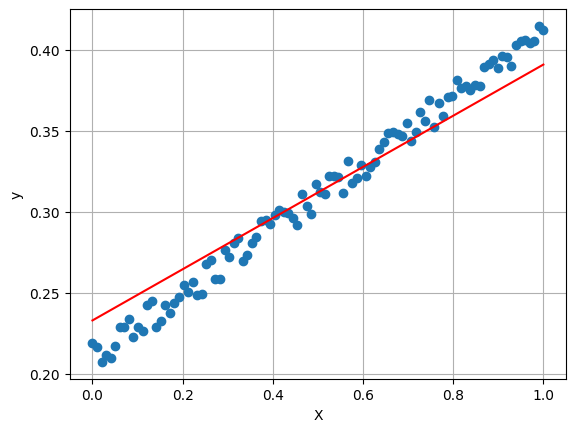

In [206]:
plt.plot(X, y, 'o')
plt.plot(X, thetas[0] + thetas[1]*X, 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

# 9.

Se emplea la regresión lineal usando las funciónes `LinearRegression()` y `fit(X, y)` de `sklearn`.

In [207]:
reg = LinearRegression().fit(X.reshape(-1,1), y)

Se obtienen el intercepto $\theta_0$ y el coeficiente $\theta_1$:

In [208]:
intercepto = reg.intercept_
coef = reg.coef_[0]

Se comparan los modelos:

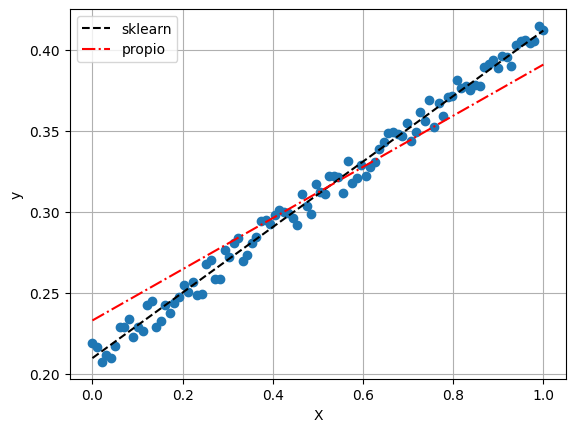

In [209]:
plt.plot(X, y, 'o')
plt.plot(X, intercepto + coef*X, '--', c='black', label='sklearn')
plt.plot(X, thetas[0] + thetas[1]*X, '-.', c='red', label='propio')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()